In [ ]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns


In [ ]:
data=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df=data.head(10)

Univarient analysis

<BarContainer object of 10 artists>

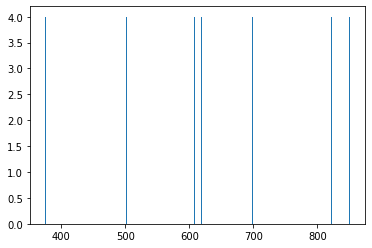

In [ ]:
import matplotlib.pyplot as plt
plt.bar (df['CreditScore'],4)

Bivariate Analysis

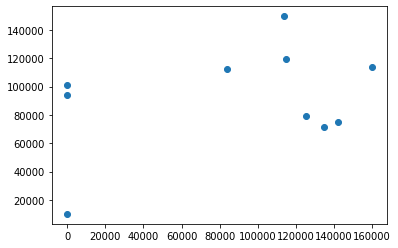

In [ ]:
plt.scatter(df['Balance'],df['EstimatedSalary'])

Multivariate analysis

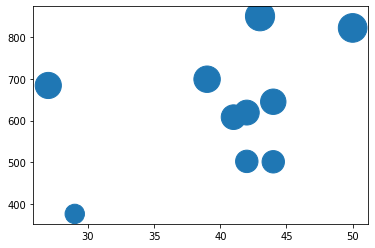

In [ ]:
plt.scatter(df['Age'],df['CreditScore'],df['Cred'])

Perform Descriptive statistics on the dataset

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handle missing values

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Finding Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


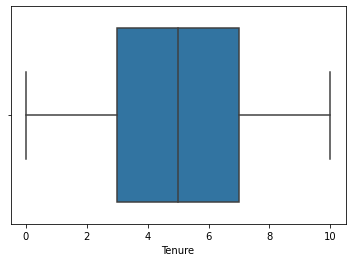

In [ ]:
sns.boxplot(data['Tenure'])

Removing outliers

In [ ]:
q=data.quantile(q=[0.75,0.5])

In [ ]:
iqr=q.iloc[0]-q.iloc[1]

In [ ]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [ ]:
l=q.iloc[1]-(1.5*iqr)

In [ ]:
l['Tenure']

2.0

In [ ]:
u=q.iloc[1]+(1.5*iqr)
u['Tenure']

8.0

In [ ]:
data['Tenure']=np.where(data['Tenure']>u['Tenure'],u['Tenure'],np.where(data['Tenure']<l['Tenure'],l['Tenure'],data['Tenure']))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


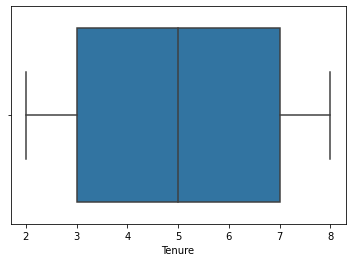

In [ ]:
sns.boxplot(data['Tenure'])

Check for categorical column and perform encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10 non-null     int64  
 1   CustomerId       10 non-null     int64  
 2   Surname          10 non-null     object 
 3   CreditScore      10 non-null     int64  
 4   Geography        10 non-null     object 
 5   Gender           10 non-null     object 
 6   Age              10 non-null     int64  
 7   Tenure           10 non-null     int64  
 8   Balance          10 non-null     float64
 9   NumOfProducts    10 non-null     int64  
 10  HasCrCard        10 non-null     int64  
 11  IsActiveMember   10 non-null     int64  
 12  EstimatedSalary  10 non-null     float64
 13  Exited           10 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [ ]:
le=LabelEncoder()

In [ ]:
data['Geography']=le.fit_transform(data['Geography'])

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,2.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,2.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,Male,35,8.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [ ]:
data['Surname']=le.fit_transform(data['Surname'])


In [ ]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])


In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41,2.0,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39,2.0,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,0,35,8.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,1,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,0,42,3.0,75075.31,2,1,0,92888.52,1


Split the data into dependent and independent variables

In [ ]:
x=data.iloc[:,0:13]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,1,42,2.0,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,1,41,2.0,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,1,42,8.0,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,1,39,2.0,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,1,43,2.0,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5.0,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,0,35,8.0,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,1,36,7.0,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,0,42,3.0,75075.31,2,1,0,92888.52


Dependent variables

In [ ]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Scale the independent variables

Split the data into training and testing data

In [ ]:
from sklearn.preprocessing import scale


In [ ]:
scale(x)

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8814,8815,15589725,2927,740,0,1,51,4.0,0.00,2,1,1,178929.84
9826,9827,15686917,2661,789,2,1,40,4.0,0.00,2,1,0,137402.27
3858,3859,15658449,529,695,0,0,45,8.0,43134.65,1,0,1,77330.35
4961,4962,15632521,427,689,1,0,45,2.0,130170.82,2,1,0,150856.38
2147,2148,15574167,923,665,0,0,33,2.0,101286.11,1,1,1,159840.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,8677,15576124,1885,582,0,0,41,2.0,40488.76,1,1,0,128528.83
3926,3927,15581280,124,714,1,0,29,6.0,92887.13,1,1,1,69578.49
1619,1620,15770309,1736,656,0,0,18,8.0,151762.74,1,0,1,127014.32
5404,5405,15801417,1288,657,0,0,37,4.0,82500.28,1,1,1,115260.72


In [ ]:
x_train.shape

(8000, 13)

In [ ]:
y_train

8814    0
9826    0
3858    0
4961    0
2147    0
       ..
8676    0
3926    0
1619    0
5404    0
6286    0
Name: Exited, Length: 8000, dtype: int64

In [ ]:
y_train.shape

(8000,)

In [ ]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6955,6956,15697042,985,738,2,0,35,8.0,127290.61,1,1,0,16081.62
839,840,15727915,110,507,0,0,36,4.0,83543.37,1,0,0,140134.43
8857,8858,15810826,487,624,0,0,36,6.0,0.00,2,0,0,84749.96
1314,1315,15644833,764,675,0,0,54,2.0,0.00,1,1,0,149583.67
2852,2853,15771483,106,609,0,0,40,6.0,0.00,2,1,1,97416.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,4075,15609676,1944,718,0,1,35,2.0,167924.95,1,1,0,43024.64
3565,3566,15598700,1259,676,2,1,30,5.0,0.00,2,0,1,157888.50
4161,4162,15611371,2446,736,0,0,43,4.0,176134.54,1,1,1,52856.88
454,455,15726631,1178,758,0,1,39,6.0,127357.76,1,0,1,56577.00


In [ ]:
x_test.shape

(2000, 13)

In [ ]:
y_test

6955    0
839     0
8857    0
1314    1
2852    0
       ..
4074    0
3565    0
4161    0
454     0
8191    0
Name: Exited, Length: 2000, dtype: int64

In [ ]:
y_test.shape

(2000,)